In [19]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [20]:
# minorized reference
with h5py.File('/global/u2/k/kberard/SCGSR/Research/Diamond/Data/density_tot_ref.h5', 'r') as file:
    #print("Keys: %s" % file.keys())
    ref_d = file['density'][:]
#print(ref_d)
print(ref_d.shape)
minorized_ref_d = (np.sum(ref_d,axis=2))
minorized_ref_d.shape



(64, 64, 64)


(64, 64)

In [21]:
####################################################################################################################################################
def stochastic_density(d,N):
    # poisson model
    #  accurate and fast for all values of N
    # N  = number of MC samples
    assert isinstance(d,np.ndarray)
    assert isinstance(N,(int,float,np.int64,np.float64))
    assert N>0
    ds = np.random.poisson(N*d)/N
    ds*= d.sum()/ds.sum()
    return ds
#end def stochastic_density

####################################################################################################################################################

In [22]:
print(ref_d.shape)
"""y_train_3d = np.zeros((5000,64,64,64))
for i in range (len(y_train_3d)):
    y_train_3d[i] =  stochastic_density(ref_d,4770000)
y_train = (np.sum(y_train_3d,axis=2))"""

x_train_3d = np.zeros((5000,64,64,64))
for i in range (int(len(x_train_3d)/5)):
    for j in range (5):     
        x_train_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))
x_train = (np.sum(x_train_3d,axis=2))

print("train generated")

(64, 64, 64)
train generated


In [ ]:
print(ref_d.shape)
"""y_val_3d = np.zeros((1000,64,64,64))
for i in range (len(y_val_3d)):
    y_val_3d[i] =  stochastic_density(ref_d,4770000)
y_val = (np.sum(y_val_3d,axis=2))"""

x_val_3d = np.zeros((1000,64,64,64))
for i in range (int(len(x_val_3d)/5)):
    for j in range (5):     
        x_val_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))
x_val = (np.sum(x_val_3d,axis=2))
print("val generated")

In [ ]:
#################  add more diverse set of training data and fix overfilling!!!!!!!!!!

In [ ]:
print(ref_d.shape)
"""y_test_3d = np.zeros((500,64,64,64))
for i in range (len(y_test_3d)):
    y_test_3d[i] =  stochastic_density(ref_d,4770000)
y_test = (np.sum(y_test_3d,axis=2))"""
x_test_3d = np.zeros((500,64,64,64))
for i in range (int(len(x_test_3d)/5)):
    x_test_3d[i] =  stochastic_density(ref_d,10000*5)
x_test = (np.sum(x_test_3d,axis=2))
print("test generated")


In [ ]:
################## Test what number of samples #####################
"""y_tvt = stochastic_density(ref_d,4770000)
print(y_tvt.shape)
print("target error is =",np.linalg.norm(ref_d-tot_VMC_d[1]))
print("current error is =",np.linalg.norm(ref_d-y_tvt[1]))"""

In [ ]:
y_test_3d = np.zeros((x_test.shape[0],64,64,64))
y_train_3d = np.zeros((x_train.shape[0],64,64,64))
y_val_3d = np.zeros((x_val.shape[0],64,64,64))
for i in range (y_test_3d.shape[0]):
    y_test_3d[i]=stochastic_density(ref_d,1000000)
y_test = (np.sum(y_test_3d,axis=2))

for i in range (y_train_3d.shape[0]):
    y_train_3d[i]=stochastic_density(ref_d,1000000)
y_train = (np.sum(y_train_3d,axis=2))

for i in range (y_val_3d.shape[0]):
    y_val_3d[i]=stochastic_density(ref_d,1000000)
y_val = (np.sum(y_val_3d,axis=2))
print("here")

In [ ]:
print("here")

In [ ]:
"""y_test = np.zeros((x_test.shape))
y_train = np.zeros((x_train.shape))
y_val = np.zeros((x_val.shape))
for i in range (y_test.shape[0]):
    y_test[i]=minorized_ref_d

for i in range (y_train.shape[0]):
    y_train[i]=minorized_ref_d

for i in range (y_val.shape[0]):
    y_val[i]=minorized_ref_d"""

In [ ]:
# Add channel dimension
x_train = x_train[..., np.newaxis]
x_val   = x_val[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

y_train = y_train[..., np.newaxis]
y_val   = y_val[..., np.newaxis]
y_test   = y_test[..., np.newaxis]

In [ ]:
import tensorflow as tf

def jensen_shannon_divergence_loss(y_true, y_pred):
    y_t = tf.cast(y_true, tf.float32)
    y_p = tf.cast(y_pred, tf.float32)

    y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
    y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])

    y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
    y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8

    m = 0.5 * (y_t + y_p)

    kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
    kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)

    jsd = 0.5 * (kl_true + kl_pred)

    return tf.reduce_mean(jsd)


In [ ]:
# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))


print("divergence difference")              
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))

# should be on the order of 1.4 10^-5

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9.4006e-05 - val_loss: 9.3929e-05
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3890e-05 - val_loss: 9.3766e-05
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.3717e-05 - val_loss: 9.3569e-05
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3511e-05 - val_loss: 9.3347e-05
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.3284e-05 - val_loss: 9.3106e-05
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.3040e-05 - val_loss: 9.2849e-05
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.2780e-05 - val_loss: 9.2579e-05
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2509e-05 - val_loss: 9.2297e-05
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.2223e-05 - val_loss: 9.2002e-05
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.1923e-05 - val_loss: 9.1693e-05
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 1

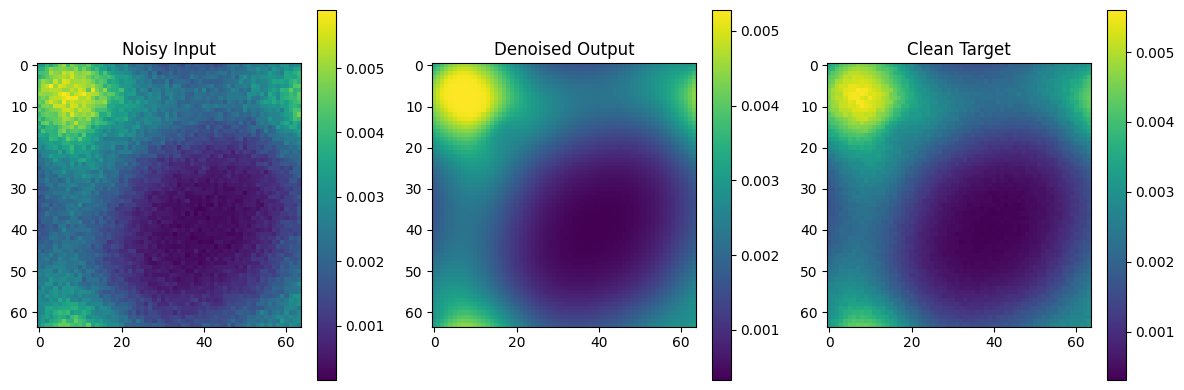

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
from tensorflow.keras.utils import register_keras_serializable


# --- Custom Renormalization Layer ---
@register_keras_serializable(package="Custom")
class Renormalize(tf.keras.layers.Layer):
    def __init__(self, target_sum=8.0, **kwargs):
        super().__init__(**kwargs)
        self.target_sum = target_sum

    def call(self, inputs):
        x_sum = tf.reduce_sum(inputs, axis=[1, 2, 3], keepdims=True)
        return inputs / (x_sum + 1e-8) * self.target_sum

    def get_config(self):
        config = super().get_config()
        config.update({'target_sum': self.target_sum})
        return config


# --- Custom JS Divergence Loss ---
@register_keras_serializable(package="Custom")
def jensen_shannon_divergence_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    m = 0.5 * (y_true + y_pred)
    return 0.5 * tf.reduce_mean(
        tf.keras.losses.KLDivergence()(y_true, m) +
        tf.keras.losses.KLDivergence()(y_pred, m)
    )


# --- Create DAE Model ---
def create_dae(input_shape):
    flat_dim = np.prod(input_shape)
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(flat_dim, activation='sigmoid'),
        layers.Reshape(target_shape=input_shape),
        Renormalize(target_sum=8.0)  # Use the custom layer here
    ])
    return model


# --- Main ---
if __name__ == '__main__':
    input_shape = (64, 64, 1)

    dae = create_dae(input_shape)
    dae.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss=jensen_shannon_divergence_loss)

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    dae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=100,
            batch_size=50,
            callbacks=[early_stop],
            verbose=1)

    # --- Predict and Plot ---
    i = 0
    denoised_norm = dae.predict(x_test[i:i+1])[0, ..., 0]
    denoised = denoised_norm
    noisy_input = x_test[i, ..., 0]
    true_clean = y_test[i, ..., 0]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(noisy_input, cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(true_clean, cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


In [17]:
 dae.save("DAE.keras")

In [18]:
# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))


print("divergence difference")              
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))

# should be on the order of 1.4 10^-5

2 norm difference
Mean vs DFT 2 norm diff
0.11725340446181821
divergence difference
JSD (bar{x_test},y_dft): tf.Tensor(0.018194474, shape=(), dtype=float32)


In [15]:
# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(x_test[0,:,:,0]-minorized_ref_d))
print(x_test[0,:,:,0].shape)
print(minorized_ref_d.shape)

Mean vs DFT 2 norm diff
0.11725127532974691
prediction of one test sample vs DFT
0.012639406812878898
(64, 64)
(64, 64)


In [19]:
# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(dae.predict(x_test[0:0+1])[0,:,:,0]-minorized_ref_d))
print()

print("divergence difference")
mean_pred = dae.predict(np.mean(x_test.copy(),axis=0).reshape(1,64,64,1))                 
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))
print("JSD (DAE(bar{x}),y_dft):", jensen_shannon_divergence_loss(np.squeeze(mean_pred), minorized_ref_d.copy()))
print("JSD (DAE(_i}),y_dft):", jensen_shannon_divergence_loss(dae.predict(x_test[0:0+1])[0,:,:,0], minorized_ref_d.copy()))

print("average of test is worse than the pred of the average of x_test and single sample pred is a little worse than average")


2 norm difference
Mean vs DFT 2 norm diff
0.11725127532974691
prediction of one test sample vs DFT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
0.0013101713005941784

divergence difference
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
JSD (bar{x_test},y_dft): tf.Tensor(0.018194463, shape=(), dtype=float32)
JSD (DAE(bar{x}),y_dft): tf.Tensor(6.425021e-07, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
JSD (DAE(_i}),y_dft): tf.Tensor(6.5214954e-07, shape=(), dtype=float32)
average of test is worse than the pred of the average of x_test and single sample pred is a little worse than average


In [25]:
print(x_test[0].shape)

(64, 64, 1)


number of electron is should = 8 8.0
ERROR! Session/line number was not unique in database. History logging moved to new session 288
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 8.6188e-05 - val_loss: 3.6527e-05
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 3.7056e-05 - val_loss: 3.4754e-05
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 3.5143e-05 - val_loss: 3.4287e-05
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 3.3631e-05 - val_loss: 3.4064e-05
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 3.5193e-05 - val_loss: 3.3983e-05
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 3.4138e-05 - val_loss: 3.3927e-05
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 3.4569e-05 - val_loss: 3.3897e-05
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 3.3780e-05 - val_loss: 3.4043e-05
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 3.3221e-05 - val_loss: 3.3891e-05
Epoch 10/10

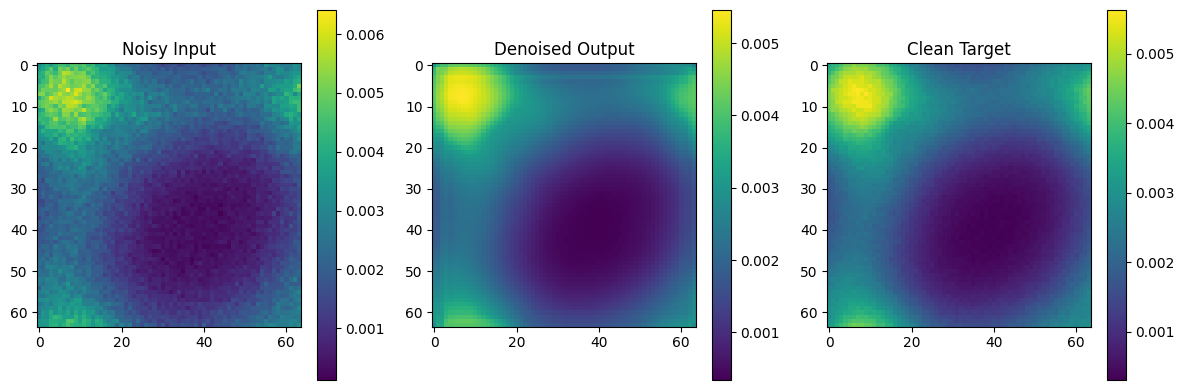

In [20]:
#check the number of electrons
# need to ensure this is kept true throught taining
print("number of electron is should = 8",np.sum(denoised.sum(axis=1)))


import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt



def create_cae(input_shape, target_sum=8.0):
    input_layer = layers.Input(shape=input_shape)
    # Renormalize output to have a fixed sum (e.g., 8 electrons)
    def renormalize(x):
        x_sum = tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True)
        return x / (x_sum + 1e-8) * target_sum
    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
    #x = layers.Lambda(renormalize)(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    #x = layers.Lambda(renormalize)(x)

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    #x = layers.Lambda(renormalize)(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    #x = layers.Lambda(renormalize)(x)
    x = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)  # use relu to ensure non-negativity



    output_layer = layers.Lambda(renormalize)(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# --- Main ---
if __name__ == '__main__':
    input_shape = (64, 64, 1)  # CAE expects 4D shape with channel

    # Create model
    cae = create_cae(input_shape)
    cae.compile(optimizer='adam', loss=jensen_shannon_divergence_loss)



    # --- Early stopping ---
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # --- Train ---
    cae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=10,
            batch_size=20,
            callbacks=[early_stop],
            verbose=1)

    # --- Predict and plot ---
    i = 0  # test sample index
    denoised_norm = cae.predict(x_test[i:i+1])[0, ..., 0]
    denoised = denoised_norm

    # --- Plot ---
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(x_test[i, ..., 0], cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(y_test[0], cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0031 - val_loss: 0.0031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


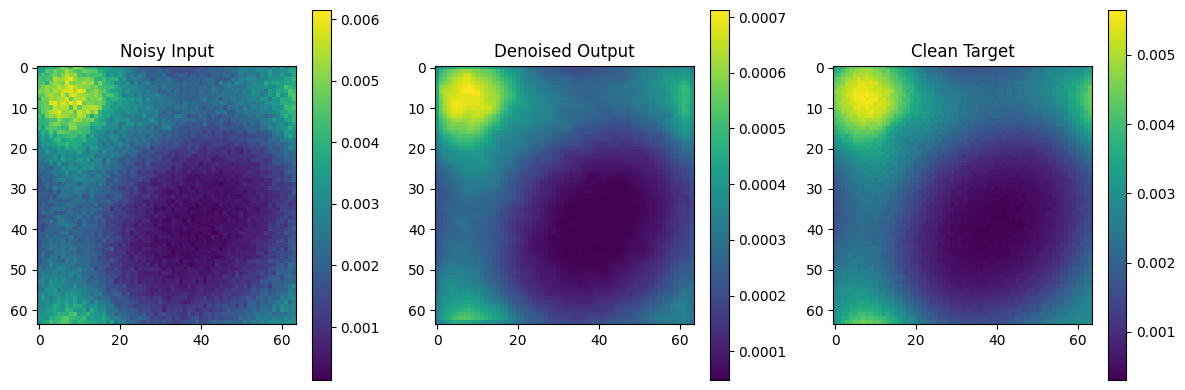

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import register_keras_serializable
import matplotlib.pyplot as plt

# === Custom Layer ===
@register_keras_serializable()
class Renormalize(layers.Layer):
    def __init__(self, target_sum=8.0, **kwargs):
        super().__init__(**kwargs)
        self.target_sum = target_sum

    def call(self, inputs):
        x_sum = tf.reduce_sum(inputs, axis=[1, 2, 3], keepdims=True)
        return inputs / (x_sum + 1e-8) * self.target_sum

    def get_config(self):
        config = super().get_config()
        config.update({'target_sum': self.target_sum})
        return config

# === Custom Loss ===
@register_keras_serializable()
def jensen_shannon_divergence_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    m = 0.5 * (y_true + y_pred)
    return 0.5 * tf.reduce_mean(
        tf.keras.losses.KLDivergence()(y_true, m) +
        tf.keras.losses.KLDivergence()(y_pred, m)
    )

# === Model Builder ===
def create_cae(input_shape, target_sum=8.0):
    input_layer = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)

    # Replace Lambda with custom layer
    output_layer = Renormalize(target_sum=target_sum)(x)

    return models.Model(inputs=input_layer, outputs=output_layer)

# === Main Execution ===
if __name__ == '__main__':
    input_shape = (64, 64, 1)


    cae = create_cae(input_shape)
    cae.compile(optimizer='adam', loss=jensen_shannon_divergence_loss)

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    cae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=10,
            batch_size=20,
            callbacks=[early_stop],
            verbose=1)

    cae.save("CAE.keras")

    # Predict and plot
    i = 0
    denoised = cae.predict(x_test[i:i+1])[0, ..., 0]

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(x_test[i, ..., 0], cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(y_test[i, ..., 0], cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


In [24]:
cae.save("CAE.keras")

In [21]:


# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(cae.predict(x_test[0:0+1])[0,:,:,0]-minorized_ref_d))
print()

print("divergence difference")
mean_pred = cae.predict(np.mean(x_test.copy(),axis=0).reshape(1,64,64,1))                 
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))
print("JSD (DAE(bar{x}),y_dft):", jensen_shannon_divergence_loss(np.squeeze(mean_pred), minorized_ref_d.copy()))
print("JSD (DAE(_i}),y_dft):", jensen_shannon_divergence_loss(cae.predict(x_test[0:0+1])[0,:,:,0], minorized_ref_d.copy()))


print("not working bettterrr!!!!!!!!")

2 norm difference
Mean vs DFT 2 norm diff
0.11725127532974691
prediction of one test sample vs DFT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
0.004549775912792918

divergence difference
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
JSD (bar{x_test},y_dft): tf.Tensor(0.018194463, shape=(), dtype=float32)
JSD (DAE(bar{x}),y_dft): tf.Tensor(0.0033683828, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
JSD (DAE(_i}),y_dft): tf.Tensor(1.6342794e-05, shape=(), dtype=float32)
not working bettterrr!!!!!!!!


In [41]:
a = .32
x_m = np.squeeze(np.mean(x_test.copy(),axis=0))
print(x_m.shape)
print(minorized_ref_d.shape)
print("mean:", jensen_shannon_divergence_loss(a*x_m+(1-a)*minorized_ref_d, minorized_ref_d.copy()))
#print("mean:", jensen_shannon_divergence_loss((1-a)*np.mean(x_test.copy(),axis=0)+a*y_dft[0].copy(), y_dft[0].copy()))
print(1/a**2)

(64, 64)
(64, 64)
mean: tf.Tensor(6.630561e-07, shape=(), dtype=float32)
9.765625


In [42]:
#check the number of electrons
# need to ensure this is kept true throught taining
print("number of electron is should = 8",np.sum(denoised.sum(axis=1)))


number of electron is should = 8 7.9999995
